# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    city = f'{city}, {country}' 
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
# Temperatures in fahrenheit
units = "imperial"

# Create DataFrame
# Citipy Cities
cities_weather = pd.DataFrame({
    'City': cities}, columns=['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date'])

# Keep track of record and set counter information for query
currentSet = 0
currentRecord = 0
currentCity = "aCity"

# Loop through city list
for index, row in cities_weather.iterrows():
    try:
        # Capture the city
        currentCity = cities_weather.loc[index,"City"]
        # Create query based on the city
        query_url = f'{url}appid={weather_api_key}&q={currentCity}&units={units}'
        # Do the get and make the response json
        response = requests.get(query_url).json()

        # Capture desired data from the json response and add it to the dataframe
        cities_weather.loc[index, "Lat"] = response["coord"]["lat"]
        cities_weather.loc[index, "Lng"] = response["coord"]["lon"]
        cities_weather.loc[index, "Max Temp"] = response["main"]["temp_max"]
        cities_weather.loc[index, "Humidity"] = response["main"]["humidity"]
        cities_weather.loc[index, "Cloudiness"] = response["clouds"]["all"]
        cities_weather.loc[index, "Wind Speed"] = response["wind"]["speed"]
        cities_weather.loc[index, "Country"] = response["sys"]["country"]
        cities_weather.loc[index, "Date"] = response["dt"]
        
        # Print status to screen
        print(f"Processing Record {currentRecord} of Set {currentSet} | {currentCity}")
               
    except:
        print("City not found. Skipping...")
            
    # Counters for the printed status indicators
    if currentRecord < 50:
        currentRecord += 1
    else:
        currentSet += 1
        currentRecord = 0


City not found. Skipping...
Processing Record 1 of Set 0 | mahebourg, mu
Processing Record 2 of Set 0 | hithadhoo, mv
Processing Record 3 of Set 0 | vila franca do campo, pt
Processing Record 4 of Set 0 | busselton, au
Processing Record 5 of Set 0 | manta, ec
Processing Record 6 of Set 0 | arraial do cabo, br
City not found. Skipping...
City not found. Skipping...
Processing Record 9 of Set 0 | katsina, ng
City not found. Skipping...
Processing Record 11 of Set 0 | andros town, bs
Processing Record 12 of Set 0 | albany, au
Processing Record 13 of Set 0 | selje, no
Processing Record 14 of Set 0 | tuy hoa, vn
Processing Record 15 of Set 0 | iqaluit, ca
Processing Record 16 of Set 0 | bluff, nz
City not found. Skipping...
Processing Record 18 of Set 0 | hilo, us
Processing Record 19 of Set 0 | phangnga, th
Processing Record 20 of Set 0 | choya, ru
Processing Record 21 of Set 0 | savannakhet, la
Processing Record 22 of Set 0 | dingli, mt
Processing Record 23 of Set 0 | port elizabeth, za
P

City not found. Skipping...
Processing Record 42 of Set 3 | lavrentiya, ru
City not found. Skipping...
Processing Record 44 of Set 3 | patharia, in
Processing Record 45 of Set 3 | timbiqui, co
Processing Record 46 of Set 3 | mecca, sa
Processing Record 47 of Set 3 | flinders, au
Processing Record 48 of Set 3 | pangnirtung, ca
Processing Record 49 of Set 3 | porto seguro, br
Processing Record 50 of Set 3 | aswan, eg
City not found. Skipping...
Processing Record 1 of Set 4 | mount gambier, au
Processing Record 2 of Set 4 | lubbock, us
Processing Record 3 of Set 4 | kharan, pk
Processing Record 4 of Set 4 | dallas, us
City not found. Skipping...
Processing Record 6 of Set 4 | norman wells, ca
Processing Record 7 of Set 4 | chicama, pe
Processing Record 8 of Set 4 | cherdyn, ru
Processing Record 9 of Set 4 | aberdeen, us
Processing Record 10 of Set 4 | great yarmouth, gb
Processing Record 11 of Set 4 | olafsvik, is
City not found. Skipping...
Processing Record 13 of Set 4 | davenda, ru
Pro

City not found. Skipping...
Processing Record 28 of Set 7 | victor harbor, au
Processing Record 29 of Set 7 | najran, sa
Processing Record 30 of Set 7 | luanda, ao
Processing Record 31 of Set 7 | hovd, mn
Processing Record 32 of Set 7 | puerto del rosario, es
Processing Record 33 of Set 7 | nantucket, us
Processing Record 34 of Set 7 | erenhot, cn
Processing Record 35 of Set 7 | del rio, us
Processing Record 36 of Set 7 | palana, ru
Processing Record 37 of Set 7 | ordubad, az
Processing Record 38 of Set 7 | quzhou, cn
Processing Record 39 of Set 7 | saskylakh, ru
Processing Record 40 of Set 7 | fairbanks, us
Processing Record 41 of Set 7 | sikasso, ml
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 46 of Set 7 | vestmannaeyjar, is
Processing Record 47 of Set 7 | socorro, us
Processing Record 48 of Set 7 | chernyshevskiy, ru
City not found. Skipping...
Processing Record 50 of Set 7 | toyooka, jp
Processing

Processing Record 14 of Set 11 | mudanya, tr
Processing Record 15 of Set 11 | muroto, jp
Processing Record 16 of Set 11 | ondangwa, na
City not found. Skipping...
Processing Record 18 of Set 11 | havelock, us
Processing Record 19 of Set 11 | taoudenni, ml
Processing Record 20 of Set 11 | plastun, ru
Processing Record 21 of Set 11 | constitucion, cl
Processing Record 22 of Set 11 | lipin bor, ru
Processing Record 23 of Set 11 | aguimes, es
Processing Record 24 of Set 11 | pusad, in
Processing Record 25 of Set 11 | mehamn, no
Processing Record 26 of Set 11 | ystad, se
Processing Record 27 of Set 11 | suntar, ru
Processing Record 28 of Set 11 | auki, sb
Processing Record 29 of Set 11 | nome, us
Processing Record 30 of Set 11 | sokolo, ml
Processing Record 31 of Set 11 | evensk, ru
Processing Record 32 of Set 11 | kendari, id
Processing Record 33 of Set 11 | chotebor, cz
City not found. Skipping...
Processing Record 35 of Set 11 | plouzane, fr
Processing Record 36 of Set 11 | bananeiras, b

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Save Data to csv
cities_weather.to_csv("Resources/Sample_Weather_Data.csv", encoding="utf-8", index=False)
# Display DataFrame
cities_weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,"grand river south east, mu",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"mahebourg, mu",-20.4081,57.7,80.6,83,40,3.44,MU,1612412584
2,"hithadhoo, mv",-0.6,73.0833,82.98,72,59,7.05,MV,1612412584
3,"vila franca do campo, pt",37.7167,-25.4333,51.8,71,40,12.66,PT,1612412585
4,"busselton, au",-33.65,115.333,73,42,0,4,AU,1612412585
...,...,...,...,...,...,...,...,...,...
605,"diu, in",20.7141,70.9822,75.31,30,0,1.45,IN,1612412704
606,"shkotovo-26, ru",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,"gat, ly",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,"yinchuan, cn",38.4681,106.273,35.56,53,5,1.61,CN,1612412704


In [5]:
# Create a dataframe to clean missing data and also check for summary information
summary_df = cities_weather[['Lat','Lng','Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']]
summary_df2 = summary_df.dropna(how='all')
summary_df2

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
1,-20.4081,57.7,80.6,83,40,3.44,1612412584
2,-0.6,73.0833,82.98,72,59,7.05,1612412584
3,37.7167,-25.4333,51.8,71,40,12.66,1612412585
4,-33.65,115.333,73,42,0,4,1612412585
5,-0.95,-80.7333,76.96,87,66,8.19,1612412585
...,...,...,...,...,...,...,...
602,-20.65,-65.2167,63.39,66,100,4.7,1612412703
603,21.3469,-158.086,71.6,78,90,6.91,1612412567
605,20.7141,70.9822,75.31,30,0,1.45,1612412704
608,38.4681,106.273,35.56,53,5,1.61,1612412704


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Tested and skipped
humidity_test = cities_weather.loc[cities_weather["Humidity"] > 100]
humidity_test
# No results

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [17]:
#  Get the indices of cities that have humidity over 100%.
# Skipped

Int64Index([], dtype='int64')

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# Skipped

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

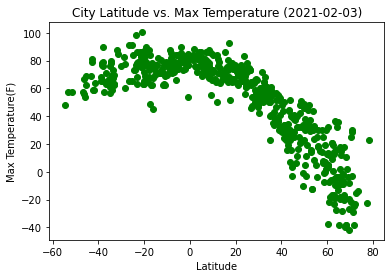

In [8]:
# Name clean data frame for following cells
clean_city_data = summary_df2

# Set plotted values
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Max Temp"]

# Capture date for title banner
currentDate = pd.Timestamp.today()
currentDate = currentDate.date()

# Plot
plt.scatter(x_values,y_values, color='green')
plt.title(f'City Latitude vs. Max Temperature ({currentDate})')
plt.ylabel('Max Temperature(F)')
plt.xlabel('Latitude')

# Save image to file
plt.savefig("../Images/Latitude and Max Temperature Scatter.png")

* It is winter in the northern hemisphere and summer in the southern hemisphere currently.  The tempartures around the equator would stay more constistant if these plots were created over time.  But that is way there are relatively few colder temparature below the equator (0 degrees latitude).

## Latitude vs. Humidity Plot

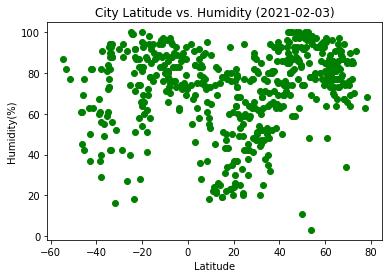

In [9]:
# Set plotted values
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Humidity"]

# Capture date for title banner
currentDate = pd.Timestamp.today()
currentDate = currentDate.date()

# Plot
plt.scatter(x_values,y_values,color='green')
plt.title(f'City Latitude vs. Humidity ({currentDate})')
plt.ylabel('Humidity(%)')
plt.xlabel('Latitude')

# Save image to file
plt.savefig("../Images/Latitude and Humidity Scatter.png")

* Humidity involves a number of factors and can be seen both above and below the equator at this time of year.

## Latitude vs. Cloudiness Plot

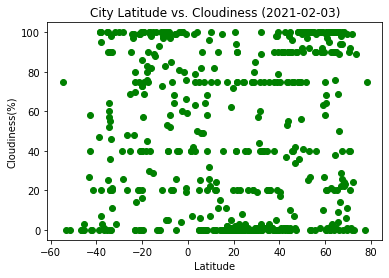

In [11]:
# Set values to plot
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Cloudiness"]

# Capture current date for title banner
currentDate = pd.Timestamp.today()
currentDate = currentDate.date()

# Plot
plt.scatter(x_values,y_values, color='green')
plt.title(f'City Latitude vs. Cloudiness ({currentDate})')
plt.ylabel('Cloudiness(%)')
plt.xlabel('Latitude')

# Save image to file
plt.savefig("../Images/Latitude and Cloudiness Scatter.png")

* Like humidity cloudiness has a variety of factors and weather patterns but there are a number of cities that collect at either 'no clouds' or 'full clouds' readings across the range of latitudes.

## Latitude vs. Wind Speed Plot

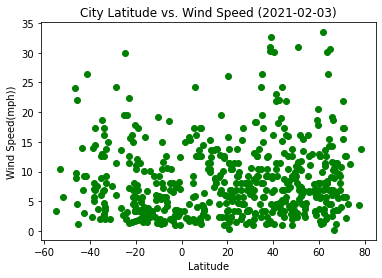

In [12]:
# Set values to plot
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Wind Speed"]

# Capture current date for title banner
currentDate = pd.Timestamp.today()
currentDate = currentDate.date()

# Plot
plt.scatter(x_values,y_values, color='green')
plt.title(f'City Latitude vs. Wind Speed ({currentDate})')
plt.ylabel('Wind Speed(mph))')
plt.xlabel('Latitude')

# Save image to file
plt.savefig("../Images/Latitude and Wind Speed Scatter.png")

* Wind speed variation seems to be fairly consistent across the range of latitude with more significant readings toward the poles.

## Linear Regression

In [13]:
# Divide current data set into norther and southern hemisphere based on latitude
northern_hemi_df = clean_city_data.loc[clean_city_data["Lat"] > 0]

southern_hemi_df = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.9005123595012625


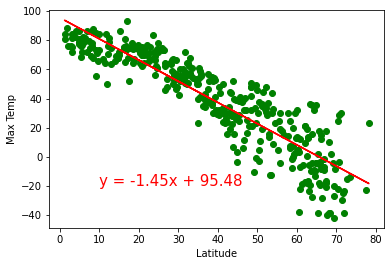

In [14]:
# Set values to plot and type for linear regression
x_values = northern_hemi_df["Lat"]
x_values = x_values.astype('float32')
y_values = northern_hemi_df["Max Temp"]
y_values = y_values.astype('float32')

# Standard regression programming. X and Y 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values, color = 'green')
plt.plot(x_values,regress_values,"r-")
# Format
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')

# Save image to file
plt.savefig("../Images/NH Temp and Latitude Regression.png")

print(f"The r-value is: {rvalue}")

* In the northern hemisphere because it's currently winter there's and inverse relationship of temperature declining as  the readings move further away from the equator.  The r value indicates this is a fairly strong trend.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.393096041265051


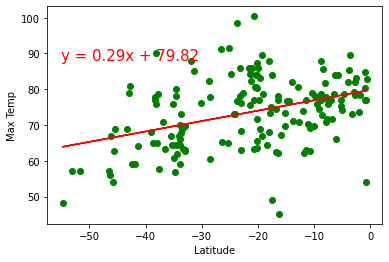

In [15]:
# Set values to plot and type for linear regression
x_values = southern_hemi_df["Lat"]
x_values = x_values.astype('float32')
y_values = southern_hemi_df["Max Temp"]
y_values = y_values.astype('float32')

# Standard regression programming. X and Y 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values, color='green')
plt.plot(x_values,regress_values,"r-")
# Format
plt.annotate(line_eq,(-55,88),fontsize=15,color="red")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')

# Save image to file
plt.savefig("../Images/SH Temp and Latitude Regression.png")

print(f"The r-value is: {rvalue}")

* In the southern hemisphere it's currently summer so the slope of the regression line is not as steep.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.42735803456937277


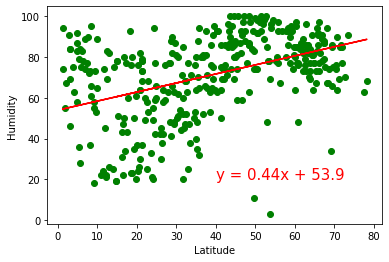

In [16]:
# Set values to plot and type for linear regression
x_values = northern_hemi_df["Lat"]
x_values = x_values.astype('float32')
y_values = northern_hemi_df["Humidity"]
y_values = y_values.astype('float32')

# Standard regression programming. X and Y 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values, color='green')
plt.plot(x_values,regress_values,"r-")
# Format
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.ylabel('Humidity')
plt.xlabel('Latitude')

# Save image to file
plt.savefig("../Images/NH Humidity and Latitude Regression.png")

print(f"The r-value is: {rvalue}")

* The regression indicates a weak but positive correlation of increasing humidity when moving away from the equator.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3114034006620674


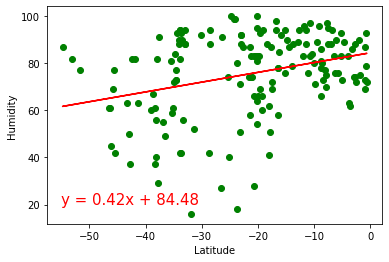

In [17]:
# Set values to plot and type for linear regression
x_values = southern_hemi_df["Lat"]
x_values = x_values.astype('float32')
y_values = southern_hemi_df["Humidity"]
y_values = y_values.astype('float32')

# Standard regression programming. X and Y 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values, color='green')
plt.plot(x_values,regress_values,"r-")
# Format
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.ylabel('Humidity')
plt.xlabel('Latitude')

# Save image to file
plt.savefig("../Images/SH Temp and Latitude Regression.png")

print(f"The r-value is: {rvalue}")

* Similar to the northern hemisphere there's a weak but positive correlation between increasing humidity and moving south away from the equator.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2838582333561511


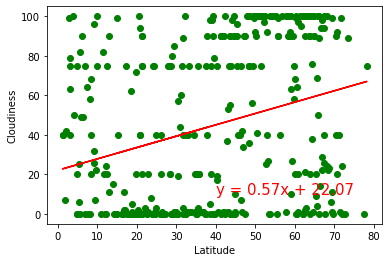

In [18]:
# Set values to plot and type for linear regression
x_values = northern_hemi_df["Lat"]
x_values = x_values.astype('float32')
y_values = northern_hemi_df["Cloudiness"]
y_values = y_values.astype('float32')

# Standard regression programming. X and Y 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values, color='green')
plt.plot(x_values,regress_values,"r-")
# Format
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')

# Save image to file
plt.savefig("../Images/NH Cloudiness and Latitude Regression.png")

print(f"The r-value is: {rvalue}")

* Cloudiness has very little predictable correlation above the equator.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.32969821524360843


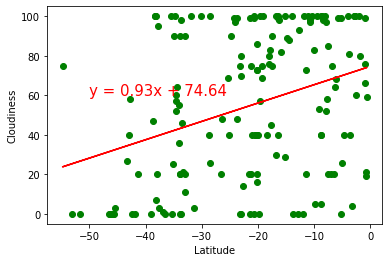

In [19]:
# Set values to plot and type for linear regression
x_values = southern_hemi_df["Lat"]
x_values = x_values.astype('float32')
y_values = southern_hemi_df["Cloudiness"]
y_values = y_values.astype('float32')

# Standard regression programming. X and Y 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values, color='green')
plt.plot(x_values,regress_values,"r-")
# Format
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')

# Save image to file
plt.savefig("../Images/SH Cloudiness and Latitude Regression.png")

print(f"The r-value is: {rvalue}")

* Cloudiness has very little predictable correlation below the equator.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.08066811902617334


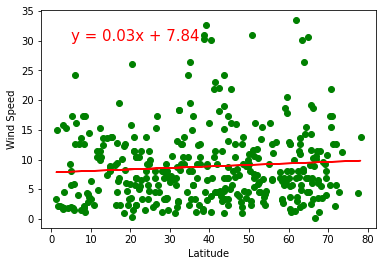

In [23]:
# Set values to plot and type for linear regression
x_values = northern_hemi_df["Lat"]
x_values = x_values.astype('float32')
y_values = northern_hemi_df["Wind Speed"]
y_values = y_values.astype('float32')

# Standard regression programming. X and Y 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values, color='green')
plt.plot(x_values,regress_values,"r-")
# Format
plt.annotate(line_eq,(5,30),fontsize=15,color="red")
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')

# Save image to file
plt.savefig("../Images/NH Wind Speed and Latitude Regression.png")

print(f"The r-value is: {rvalue}")

* Wind speed has very little meaningful correlation above the equator.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2435980959128633


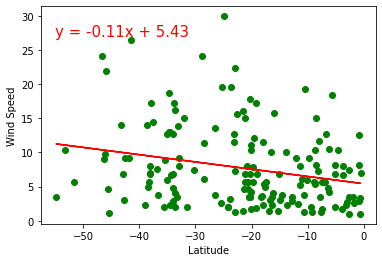

In [25]:
# Set values to plot and type for linear regression
x_values = southern_hemi_df["Lat"]
x_values = x_values.astype('float32')
y_values = southern_hemi_df["Wind Speed"]
y_values = y_values.astype('float32')

# Standard regression programming. X and Y 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values, color='green')
plt.plot(x_values,regress_values,"r-")
# Format
plt.annotate(line_eq,(-55,27),fontsize=15,color="red")
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')

# Save image to file
plt.savefig("../Images/SH Wind Speed and Latitude Regression.png")

print(f"The r-value is: {rvalue}")

* In the summer time in the southern hemisphere there is a weak indicator that wind speed reduces in places closer to the equator.